<a href="https://colab.research.google.com/github/joeldsouza2001/ML/blob/main/flight_fare_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
dt = pd.read_excel('/content/Data_Train.xlsx')
dt2 = dt.copy()

test = pd.read_excel('/content/Test_set.xlsx')


In [49]:
dt

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [50]:
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [51]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [53]:
dt.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [54]:
test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


# Handling missing data

In [55]:
dt.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [56]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

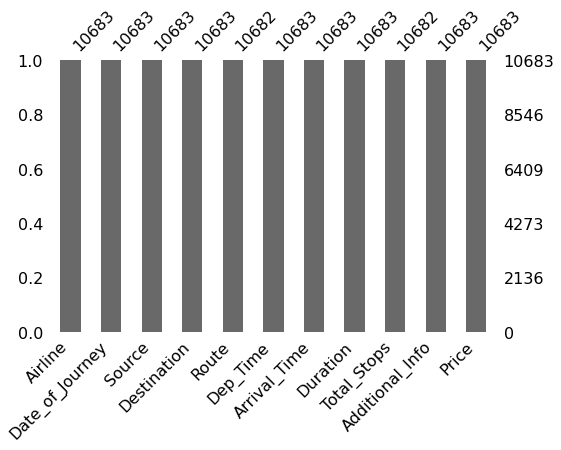

In [57]:
import missingno
missingno.bar(dt,figsize=(8,5))


In [58]:
#Dropping missing data

dt.dropna(inplace=True)

In [59]:
dt.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [60]:
dt.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [61]:
test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [62]:
lst = ['Dep_Time','Arrival_Time','Date_of_Journey']

In [63]:
for i in lst:
  dt[i] = pd.to_datetime(dt[i])
  test[i] = pd.to_datetime(test[i])

In [64]:
dt.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [65]:
dt.head(8)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-11-04 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-11-04 05:50:00,2021-11-04 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-11-04 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-11-04 18:05:00,2021-11-04 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-11-04 16:50:00,2021-11-04 21:35:00,4h 45m,1 stop,No info,13302
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2021-11-04 09:00:00,2021-11-04 11:25:00,2h 25m,non-stop,No info,3873
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2021-11-04 18:55:00,2021-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,2021-11-04 08:00:00,2021-03-02 05:05:00,21h 5m,1 stop,No info,22270


In [66]:
dt['Journey_date'] = dt['Date_of_Journey'].dt.day
dt['Journey_month'] = dt['Date_of_Journey'].dt.month

test['Journey_date'] = test['Date_of_Journey'].dt.day
test['Journey_month'] = test['Date_of_Journey'].dt.month

In [67]:
dt.drop('Date_of_Journey',axis=1,inplace=True)
test.drop('Date_of_Journey',axis=1,inplace=True)

In [68]:
dt.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-11-04 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-11-04 05:50:00,2021-11-04 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-11-04 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9


In [69]:
test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_date,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2021-11-04 17:30:00,2021-06-07 04:25:00,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,2021-11-04 06:20:00,2021-11-04 10:20:00,4h,1 stop,No info,5,12
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2021-11-04 19:15:00,2021-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,2021-11-04 08:00:00,2021-11-04 21:00:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,2021-11-04 23:55:00,2021-06-25 02:45:00,2h 50m,non-stop,No info,24,6


In [70]:
dt['Dep_hour'] = dt['Dep_Time'].dt.hour
dt['Dep_min'] = dt['Dep_Time'].dt.minute

dt['Arr_hour'] = dt['Arrival_Time'].dt.hour
dt['Arr_min'] = dt['Arrival_Time'].dt.minute


test['Dep_hour'] = test['Dep_Time'].dt.hour
test['Dep_min'] = test['Dep_Time'].dt.minute

test['Arr_hour'] = test['Arrival_Time'].dt.hour
test['Arr_min'] = test['Arrival_Time'].dt.minute

dt.drop('Arrival_Time',axis=1,inplace=True)
dt.drop('Dep_Time',axis=1,inplace=True)

test.drop('Arrival_Time',axis=1,inplace=True)
test.drop('Dep_Time',axis=1,inplace=True)

In [71]:
dt.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [72]:
def duration_col(col):
  print(col)
  if(len(col.split(' '))==2):
    return col
  else:
    if 'h' in col:
      return col+' 00m'
    else:
      return '00h '+col[0]

In [73]:
dt['Duration'] = dt['Duration'].apply(duration_col)
test['Duration'] = test['Duration'].apply(duration_col)


Streaming output truncated to the last 5000 lines.
18h 20m
25h 55m
1h 30m
23h 30m
5h
2h 45m
7h 50m
38h 20m
3h 10m
5h 10m
8h
3h 5m
7h 35m
9h 50m
20h 10m
21h 35m
2h 20m
2h 55m
2h 50m
4h 40m
12h 30m
10h 40m
22h 45m
16h 45m
2h 35m
24h 55m
5h 30m
2h 35m
26h 35m
5h
21h 15m
1h 30m
9h 40m
12h 25m
2h 50m
9h 45m
5h 30m
9h 50m
4h 5m
18h 45m
2h 50m
2h 35m
2h 30m
10h 5m
16h 5m
1h 30m
5h
4h 55m
2h 45m
2h 45m
14h
9h 15m
12h
1h 30m
2h 45m
21h 25m
42h 45m
2h 55m
2h 45m
38h 20m
1h 30m
1h 30m
2h 45m
23h 40m
2h 55m
2h 40m
12h 15m
8h 15m
2h 50m
1h 25m
11h
3h 15m
9h 30m
4h 55m
6h
1h 30m
10h 10m
1h 30m
6h 40m
2h 35m
16h 25m
22h 45m
7h 50m
26h 20m
2h 50m
19h 30m
3h 5m
3h 15m
2h 20m
9h 10m
2h 15m
6h
9h 50m
29h 50m
6h 25m
2h 20m
6h 15m
2h 40m
6h 15m
24h 35m
5h 45m
3h 15m
14h 55m
3h 40m
8h 5m
13h 25m
1h 25m
2h 50m
15h 35m
7h 20m
13h 55m
2h 30m
2h 50m
3h 15m
2h 40m
26h 15m
2h 50m
6h 15m
3h
4h 40m
1h 25m
12h
13h 10m
9h
6h 10m
3h 25m
1h 30m
2h 30m
3h 15m
1h 30m
10h 15m
8h 45m
2h 45m
5h
2h 45m
5h 55m
3h 35m
3h
17h 4

In [74]:
dt.head(6)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 00m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25


In [75]:
def duration_to_hour_split(col):
  return int(col.split(' ')[0][0:1])
  

def duration_to_min_split(col):
  return int(col.split(' ')[1][0:1])

In [76]:
dt['Duration_hour'] = dt['Duration'].apply(duration_to_hour_split)
dt['Duration_min'] = dt['Duration'].apply(duration_to_min_split)

test['Duration_hour'] = test['Duration'].apply(duration_to_hour_split)
test['Duration_min'] = test['Duration'].apply(duration_to_min_split)

In [77]:
dt.tail(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,19,55,22,25,2,3
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20,2,3
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h 00m,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,11,30,14,10,2,4
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,8h 20m,2 stops,No info,11753,5,9,10,55,19,15,8,2


In [78]:
dt.drop('Duration',axis=1,inplace=True)
test.drop('Duration',axis=1,inplace=True)

In [79]:
dt.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_date        int64
Journey_month       int64
Dep_hour            int64
Dep_min             int64
Arr_hour            int64
Arr_min             int64
Duration_hour       int64
Duration_min        int64
dtype: object

In [80]:
test.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Journey_date        int64
Journey_month       int64
Dep_hour            int64
Dep_min             int64
Arr_hour            int64
Arr_min             int64
Duration_hour       int64
Duration_min        int64
dtype: object

In [81]:
categorical_val = [col for col in dt.columns if dt[col].dtypes=='O' ]

In [82]:
categorical_val

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [83]:
nums_val = [col for col in dt.columns if dt[col].dtypes!='O']

In [84]:
nums_val

['Price',
 'Journey_date',
 'Journey_month',
 'Dep_hour',
 'Dep_min',
 'Arr_hour',
 'Arr_min',
 'Duration_hour',
 'Duration_min']

# Categorical values

In [85]:
dt['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

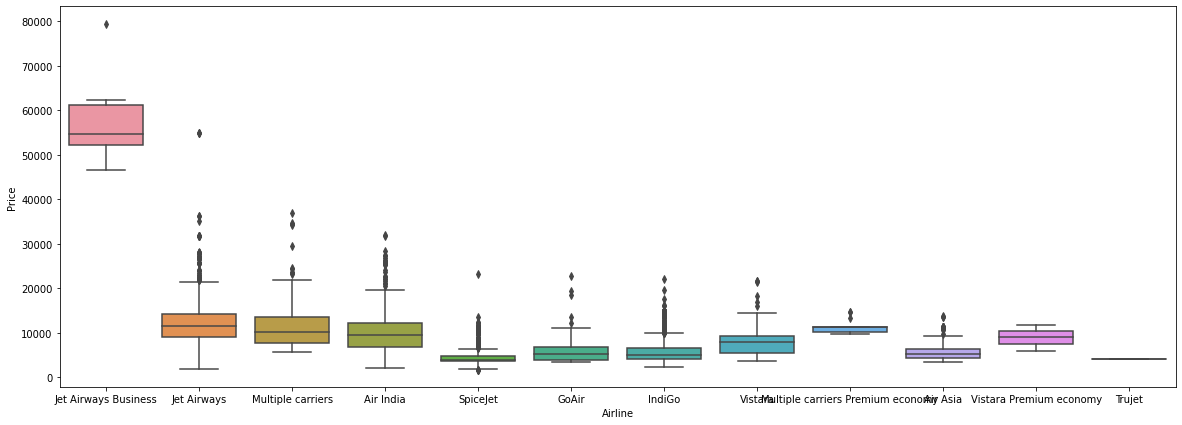

In [86]:
plt.figure(figsize=(20,7))

sns.boxplot(x='Airline',y='Price',data=dt.sort_values('Price',ascending=False))

In [87]:
dt['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

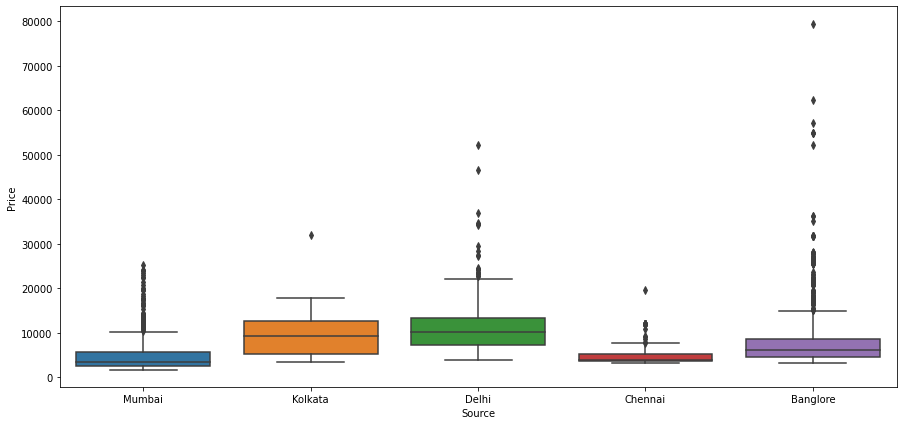

In [88]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Source',y='Price',data=dt.sort_values('Source',ascending=False))

In [89]:
dt.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,1,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,2
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,4


In [90]:
  for i in ['Source','Destination','Airline']:
    dummy = pd.get_dummies(dt[i],drop_first=True,prefix=i)
    dt = pd.concat([dt,dummy],axis=1)
    dt.drop(i,axis=1,inplace=True)

    dummy = pd.get_dummies(test[i],drop_first=True,prefix=i)
    test = pd.concat([test,dummy],axis=1)
    test.drop(i,axis=1,inplace=True)



In [91]:
dt.head(4)

,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,5,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [92]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Destination',y='Price',data=dt.sort_values('Price',ascending=False))

ValueError: ignored

<Figure size 1080x432 with 0 Axes>

In [93]:
dt['Route'].dtype

dtype('O')

In [94]:
dt['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → IXB → DEL → BLR             1
BOM → DED → DEL → HYD             1
BLR → HBX → BOM → NAG → DEL       1
BLR → HBX → BOM → AMD → DEL       1
BOM → NDC → HYD                   1
Name: Route, Length: 128, dtype: int64

In [95]:
test['Route'].value_counts()

DEL → BOM → COK                      624
BLR → DEL                            389
CCU → BOM → BLR                      253
CCU → BLR                            172
BOM → HYD                            164
                                    ... 
CCU → PAT → BLR                        1
BOM → IXC → DEL → HYD                  1
CCU → BOM → TRV → BLR                  1
BLR → CCU → BBI → HYD → VGA → DEL      1
BLR → BOM → IDR → DEL                  1
Name: Route, Length: 100, dtype: int64

In [45]:
dt['Route1']=dt['Route'].str.split('→').str[0]
dt['Route2']=dt['Route'].str.split('→').str[1]
dt['Route3']=dt['Route'].str.split('→').str[2]
dt['Route4']=dt['Route'].str.split('→').str[3]
dt['Route5']=dt['Route'].str.split('→').str[4]

In [46]:
dt.head(4)

,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route1,Route2,Route3,Route4,Route5
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,CCU,NAG,BLR,NaN,NaN


In [47]:
dt.drop('Route',axis=1,inplace=True)

In [48]:
dt.head(4)

,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route1,Route2,Route3,Route4,Route5
0,non-stop,No info,3897,24,3,22,20,1,10,2,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,BLR,DEL,NaN,NaN,NaN
1,2 stops,No info,7662,5,1,5,50,13,15,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,CCU,IXR,BBI,BLR,NaN
2,2 stops,No info,13882,6,9,9,25,4,25,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,DEL,LKO,BOM,COK,NaN
3,1 stop,No info,6218,5,12,18,5,23,30,5,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,CCU,NAG,BLR,NaN,NaN


In [49]:
dt.isnull().sum()

Total_Stops                                      0
Additional_Info                                  0
Price                                            0
Journey_date                                     0
Journey_month                                    0
Dep_hour                                         0
Dep_min                                          0
Arr_hour                                         0
Arr_min                                          0
Duration_hour                                    0
Duration_min                                     0
Airline_Air India                                0
Airline_GoAir                                    0
Airline_IndiGo                                   0
Airline_Jet Airways                              0
Airline_Jet Airways Business                     0
Airline_Multiple carriers                        0
Airline_Multiple carriers Premium economy        0
Airline_SpiceJet                                 0
Airline_Trujet                 

In [50]:
dt.fillna('None',inplace=True)

In [51]:
dt.isnull().sum()

Total_Stops                                  0
Additional_Info                              0
Price                                        0
Journey_date                                 0
Journey_month                                0
Dep_hour                                     0
Dep_min                                      0
Arr_hour                                     0
Arr_min                                      0
Duration_hour                                0
Duration_min                                 0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vista

In [52]:
dt.head()

,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route1,Route2,Route3,Route4,Route5
0,non-stop,No info,3897,24,3,22,20,1,10,2,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,BLR,DEL,None,None,None
1,2 stops,No info,7662,5,1,5,50,13,15,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,CCU,IXR,BBI,BLR,None
2,2 stops,No info,13882,6,9,9,25,4,25,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,DEL,LKO,BOM,COK,None
3,1 stop,No info,6218,5,12,18,5,23,30,5,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,CCU,NAG,BLR,None,None
4,1 stop,No info,13302,3,1,16,50,21,35,4,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,BLR,NAG,DEL,None,None


In [53]:
dt['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [54]:
dt.drop('Additional_Info',axis=1,inplace=True)

In [55]:
from sklearn.preprocessing import LabelEncoder

for i in ['Route1','Route2','Route3','Route4','Route5']:
  dt[i] = LabelEncoder().fit_transform(dt[i])


In [56]:
dt.head()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route1,Route2,Route3,Route4,Route5
0,non-stop,3897,24,3,22,20,1,10,2,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13,29,13,5
1,2 stops,7662,5,1,5,50,13,15,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,25,1,3,5
2,2 stops,13882,6,9,9,25,4,25,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3,32,4,5,5
3,1 stop,6218,5,12,18,5,23,30,5,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,34,3,13,5
4,1 stop,13302,3,1,16,50,21,35,4,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,34,8,13,5


In [57]:
dt['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [58]:
total_stops_dict = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

dt['Total_Stops'] = dt['Total_Stops'].map(total_stops_dict)

In [59]:
dt.head()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route1,Route2,Route3,Route4,Route5
0,0,3897,24,3,22,20,1,10,2,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13,29,13,5
1,2,7662,5,1,5,50,13,15,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,25,1,3,5
2,2,13882,6,9,9,25,4,25,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3,32,4,5,5
3,1,6218,5,12,18,5,23,30,5,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,34,3,13,5
4,1,13302,3,1,16,50,21,35,4,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,34,8,13,5


In [60]:
Q1 = dt['Price'].quantile(0.25)
Q2 = dt['Price'].quantile(0.5)
Q3 = dt['Price'].quantile(0.75)
Q1,Q3

(5277.0, 12373.0)

In [61]:
IQR = Q3-Q1
IQR

7096.0

In [62]:
low = Q1 - 1.5*IQR
hig = Q3 + 1.5*IQR

low,hig

(-5367.0, 23017.0)

In [63]:
outlier = dt[(dt['Price']<low)|(dt['Price']>hig)]

In [64]:
outlier

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route1,Route2,Route3,Route4,Route5
123,1,27430,3,1,23,0,19,15,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3,7,6,13,5
396,1,36983,3,1,12,50,19,15,6,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3,7,6,13,5
486,1,26890,3,1,8,55,15,15,6,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7,8,13,5
510,1,26890,3,1,7,0,12,25,5,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7,8,13,5
597,2,25139,3,6,9,40,15,15,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,29,9,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,2,24210,3,6,19,50,16,50,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,3,9,9,5
10364,1,57209,3,1,9,45,14,25,4,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,33,8,13,5
10383,1,26890,3,1,7,0,5,5,2,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7,8,13,5
10439,1,31825,3,1,18,40,9,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7,8,13,5


In [65]:
dt.describe()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route1,Route2,Route3,Route4,Route5
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601,2.803688,2.887193,0.163921,0.018161,0.192192,0.360326,0.000562,0.111964,0.001217,0.076577,0.000094,0.044842,0.000281,0.035667,0.424640,0.268770,0.065250,0.424640,0.118424,0.065250,0.035667,0.087250,2.019378,11.897959,13.232166,11.792080,4.983056
std,0.675229,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808,2.312156,1.625189,0.370221,0.133541,0.394042,0.480117,0.023695,0.315337,0.034866,0.265932,0.009676,0.206966,0.016757,0.185468,0.494311,0.443341,0.246978,0.494311,0.323124,0.246978,0.185468,0.282214,1.206239,8.006427,11.302632,2.948124,0.263913
min,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,4.000000,13.000000,5.000000
50%,1.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.000000,6.000000,13.000000,5.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,3.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,14.000000,29.000000,13.000000,5.000000
max,4.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,9.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,44.000000,29.000000,13.000000,5.000000


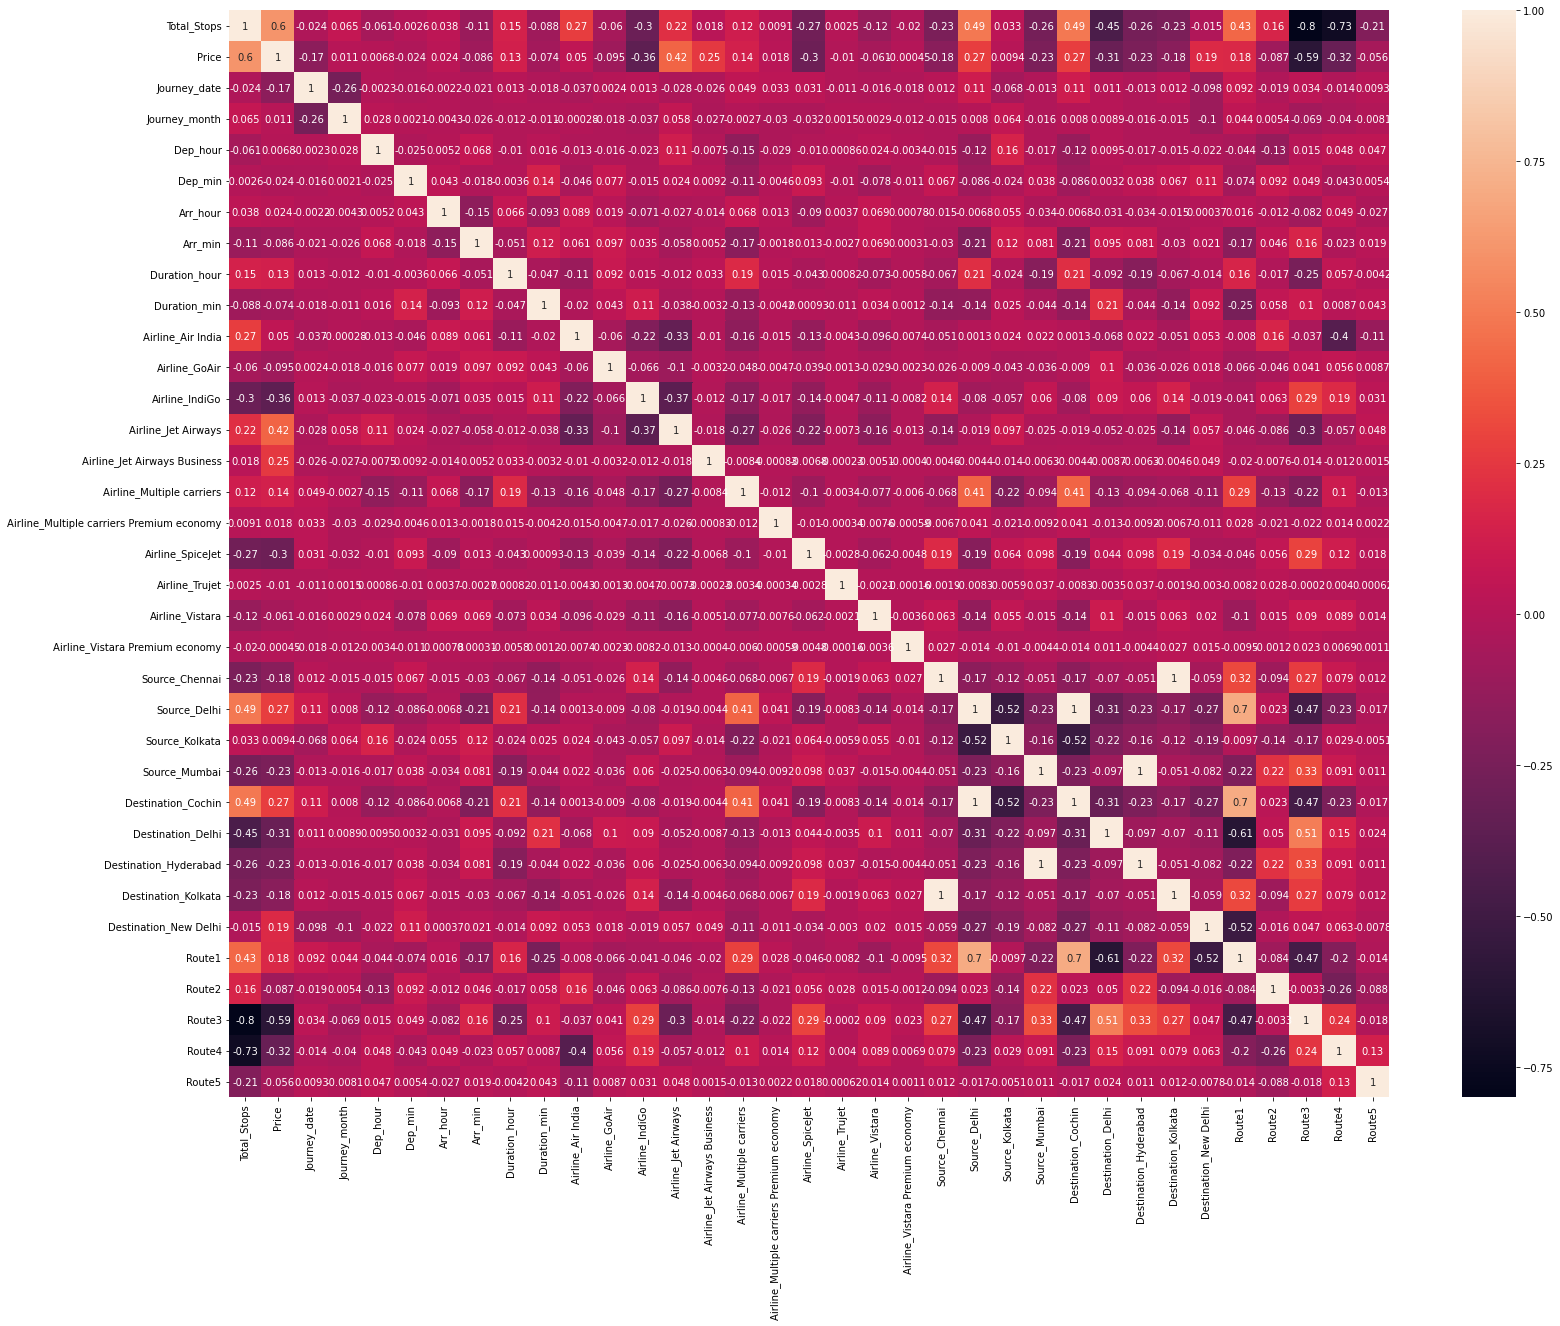

In [66]:
plt.figure(figsize=(26,20))
sns.heatmap(dt.corr(),annot=True)

In [67]:
dt.corr(method ='pearson')

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route1,Route2,Route3,Route4,Route5
Total_Stops,1.000000,0.603897,-0.024136,0.065495,-0.061476,-0.002618,0.038140,-0.106940,0.148441,-0.088119,0.271094,-0.060110,-0.302991,0.215063,0.017876,0.118399,0.009089,-0.274351,0.002519,-0.120447,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302,0.428918,0.162259,-0.800261,-0.729391,-0.207433
Price,0.603897,1.000000,-0.165448,0.010705,0.006799,-0.024458,0.024244,-0.086155,0.128231,-0.073565,0.050432,-0.095151,-0.361070,0.416124,0.253303,0.139793,0.017650,-0.296565,-0.010381,-0.060654,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777,0.182169,-0.087240,-0.591306,-0.316928,-0.055641
Journey_date,-0.024136,-0.165448,1.000000,-0.264896,-0.002301,-0.016433,-0.002176,-0.021423,0.012874,-0.018270,-0.037279,0.002350,0.013223,-0.028387,-0.026075,0.048638,0.032978,0.030767,-0.010643,-0.015935,-0.017801,0.012202,0.112092,-0.068380,-0.013391,0.112092,0.011489,-0.013391,0.012202,-0.098370,0.092303,-0.019274,0.034427,-0.013889,0.009293
Journey_month,0.065495,0.010705,-0.264896,1.000000,0.028189,0.002136,-0.004329,-0.025786,-0.011584,-0.011447,-0.000281,-0.017538,-0.037203,0.057818,-0.026727,-0.002737,-0.029617,-0.032454,0.001507,0.002856,-0.012351,-0.014993,0.008017,0.063601,-0.015696,0.008017,0.008880,-0.015696,-0.014993,-0.100533,0.044173,0.005444,-0.069195,-0.039960,-0.008100
Dep_hour,-0.061476,0.006799,-0.002301,0.028189,1.000000,-0.024745,0.005180,0.067911,-0.010237,0.015719,-0.012879,-0.016373,-0.023395,0.113942,-0.007524,-0.149992,-0.028672,-0.010451,0.000857,0.023906,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138,-0.044414,-0.126213,0.014986,0.047505,0.047014
Dep_min,-0.002618,-0.024458,-0.016433,0.002136,-0.024745,1.000000,0.043122,-0.017597,-0.003568,0.143940,-0.045688,0.076751,-0.014714,0.024455,0.009168,-0.109370,-0.004624,0.092634,-0.010007,-0.077903,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129,-0.073977,0.091579,0.049031,-0.043000,0.005445
Arr_hour,0.038140,0.024244,-0.002176,-0.004329,0.005180,0.043122,1.000000,-0.154363,0.066076,-0.093116,0.088872,0.018526,-0.071491,-0.027377,-0.014456,0.067930,0.013491,-0.090058,0.003739,0.068834,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366,0.015895,-0.012224,-0.081793,0.048578,-0.026987
Arr_min,-0.106940,-0.086155,-0.021423,-0.025786,0.067911,-0.017597,-0.154363,1.000000,-0.051389,0.117288,0.061231,0.096839,0.035124,-0.057698,0.005232,-0.167455,-0.001786,0.012543,-0.002750,0.069422,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271,-0.172995,0.045967,0.159993,-0.022571,0.019213
Duration_hour,0.148441,0.128231,0.012874,-0.011584,-0.010237,-0.003568,0.066076,-0.051389,1.000000,-0.046855,-0.108745,0.092204,0.014698,-0.012347,0.032774,0.187193,0.014578,-0.042545,0.000822,-0.073165,-0.005826,-0.066852,0.207942,-0.023691,-0.186440,0.207942,-0.092315,-0.186440,-0.066852,-0.014210,0.158937,-0.017463,-0.249220,0.056807,-0.004224
Duration_min,-0.088119,-0.073565,-0.018270,-0.011447,0.015719,0.143940,-0.093116,0.117288,-0.046855,1.000000,-0.019991,0.042658,0.107104,-0.037893,-0.003217,-0.128445,-0.004186,0.000926,-0.011236,0.033968,0.001163,-0.140712,-0.139188,0.024932,-0.043939,-0.139188,0.212641,-0.043939,-0.140712,0.092090,-0.248328,0.057512,0.103297,0.008705,0.042911


In [68]:
X = dt.drop('Price',axis=1)
y = dt['Price'] 


In [69]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

def predict(ml_model,X,y):
  
  x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
  model = ml_model.fit(x_train,y_train)

  preds = model.predict(x_test)
  print("MODEL NAME : "+str(ml_model))
  print('r2_score : '+str(r2_score(y_test,preds)))  
  print('MAE : '+str(mean_absolute_error(y_test,preds)))  
  print('MSE : '+str(mean_squared_error(y_test,preds)))  
  print('RMSE : '+str(np.sqrt(mean_squared_error(y_test,preds))))  



In [70]:
from sklearn.ensemble import RandomForestRegressor

predict(RandomForestRegressor(),X,y)



MODEL NAME : RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
r2_score : 0.8261962493931114
MAE : 1155.2425237808518
MSE : 3679090.3704154007
RMSE : 1918.0955060724689


In [71]:
from sklearn.ensemble import GradientBoostingRegressor

predict(GradientBoostingRegressor(),X,y)


MODEL NAME : GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
r2_score : 0.7738993948533744
MAE : 1497.4906508555034
MSE : 4771828.390371538
RMSE : 2184.451507901134


In [72]:
from sklearn.tree import DecisionTreeRegressor

predict(DecisionTreeRegressor(),X,y)

MODEL NAME : DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
r2_score : 0.6588968464343935
MAE : 1331.6428170332242
MSE : 6784726.082089378
RMSE : 2604.7506756097364


In [73]:
params = {'n_estimators':[100,130,160,200,230],
          'bootstrap':[True,False],
        
          }

In [74]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(RandomForestRegressor(),params,cv=5)
res = gs.fit(X,y)

print(res.best_params_)
print(res.best_score_)

{'bootstrap': True, 'n_estimators': 200}
0.8212293074592367
